# Importing Dependencies

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [89]:
df = pd.read_csv("/Users/shreyanshsourabh/Documents/ML projects/LoanPrediction.csv")

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.shape

(614, 13)

In [92]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
df = df.dropna()

In [94]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [95]:
df.shape

(480, 13)

In [96]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [97]:
df.replace({
            "Loan_Status":{'Y':1,'N':0},
            "Gender":{'Male':1,'Female':0},
            "Married":{'Yes':1,'No':0},
            "Self_Employed":{'Yes':1,'No':0},
            "Property_Area":{'Rural':0,'Urban':2,'Semiurban': 1},
            "Education":{'Graduate':1,'Not Graduate':0}
            },inplace=True)

In [98]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [99]:
#dependents value count
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [100]:
#replacing 3+ by 4
df = df.replace(to_replace = '3+', value = 4)
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

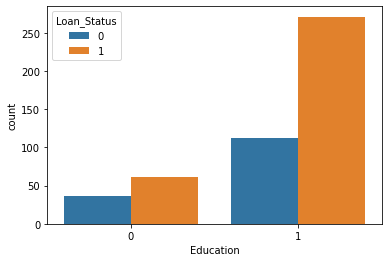

In [101]:
sns.countplot(x = 'Education',hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='Married', ylabel='count'>

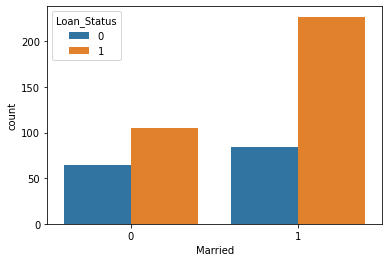

In [102]:
sns.countplot(x = 'Married',hue = 'Loan_Status', data = df)

# Splitting data

In [103]:
X = df.drop(columns = ["Loan_Status","Loan_ID"],axis = 1)
Y = df["Loan_Status"]
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [104]:
print(X.shape, Y.shape)

(480, 11) (480,)


In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 2)
print(X.shape,Y.shape,X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(480, 11) (480,) (432, 11) (48, 11) (432,) (48,)


# Training data

In [106]:
classifier = svm.SVC(kernel = 'linear')

In [107]:
#training svm
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

In [108]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Accuracy of training data: ",training_data_accuracy)

Accuracy of training data:  0.7986111111111112


In [109]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy of testing data: ",testing_data_accuracy)

Accuracy of testing data:  0.8333333333333334


# Predictive Model

In [114]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
368,1,1,1,1,0,6325,0.0,175.0,360.0,1.0,1
74,1,1,4,1,1,5266,1774.0,187.0,360.0,1.0,1
135,1,1,4,1,0,4000,7750.0,290.0,360.0,1.0,1
53,1,1,2,1,0,4616,0.0,134.0,360.0,1.0,2
96,0,1,0,1,0,2484,2302.0,137.0,360.0,1.0,1


In [111]:
Y_test.head()

368    1
74     1
135    0
53     0
96     1
Name: Loan_Status, dtype: int64

In [112]:
input_data = (1,1,2,1,0,4616,0.0,134.0,360.0,1.0,2)

#input data as numpy array
input_data_array = np.asarray(input_data)

#reshaping
input_data_reshaped = input_data_array.reshape(1,-1)



prediction = classifier.predict(input_data_reshaped)

if prediction == 1:
    print("Approved")
else:
    print("Rejected")

Approved
